In [1]:
"""
In this notebook, we will try to: find a file with sweeps > 10; the process that file using extract sweeps. We want to see if extracting the
all the sweeps changes the plot, or if it just resuls in the originl radar data.

"""

'\nIn this notebook, we will try to: find a file with sweeps > 10; the process that file using extract sweeps. We want to see if extracting the \nall the sweeps changes the plot, or if it just resuls in the originl radar data.\n\n'

## Imports

In [5]:
import pyart as pyart
import cartopy.crs as ccrs
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
%matplotlib inline


In [6]:
print(f"pyart VERSION is {pyart.__version__}")

pyart VERSION is 0.0.0


Test files to find one with multiple sweeps

In [8]:
data_folder = "subic_p/01/09"
files = glob.glob(os.path.join(data_folder, "*"))
for file in files:
    radar_file = pyart.io.read_uf(file)
    nsweeps = radar_file.nsweeps
    print(f"{file} has nsweeps={nsweeps} ")

subic_p/01/09/20190109185002.uf has nsweeps=14 
subic_p/01/09/20190109085003.uf has nsweeps=14 
subic_p/01/09/20190109065002.uf has nsweeps=14 
subic_p/01/09/20190109201002.uf has nsweeps=14 
subic_p/01/09/20190109145002.uf has nsweeps=14 
subic_p/01/09/20190109100002.uf has nsweeps=14 
subic_p/01/09/20190109124002.uf has nsweeps=14 
subic_p/01/09/20190109163002.uf has nsweeps=14 
subic_p/01/09/20190109225006.uf has nsweeps=14 
subic_p/01/09/20190109203002.uf has nsweeps=14 
subic_p/01/09/20190109120006.uf has nsweeps=14 
subic_p/01/09/20190109083003.uf has nsweeps=14 
subic_p/01/09/20190109063002.uf has nsweeps=14 
subic_p/01/09/20190109183002.uf has nsweeps=14 
subic_p/01/09/20190109161007.uf has nsweeps=14 
subic_p/01/09/20190109061006.uf has nsweeps=14 
subic_p/01/09/20190109122002.uf has nsweeps=14 
subic_p/01/09/20190109223002.uf has nsweeps=14 
subic_p/01/09/20190109074001.uf has nsweeps=14 
subic_p/01/09/20190109221002.uf has nsweeps=14 
subic_p/01/09/20190109165002.uf has nswe

Just pick the first file and use it

In [9]:
test_file = files[0]
radar_file = pyart.io.read_uf(test_file)
radar_sweeps = radar_file.extract_sweeps(range(0,radar_file.nsweeps))
print(f"radar_sweeps has nsweeps={radar_sweeps.nsweeps}")

radar_sweeps has nsweeps=14


Check the radars' scan_types. sometimes its "other"

In [19]:
print(f"radar_file has scan_type: {radar_file.scan_type}")
print(f"radar_sweeps has fields: {radar_sweeps.scan_type}")

radar_file has scan_type: ppi
radar_sweeps has fields: ppi


Check the fields we can use

In [18]:
print(f"radar_file has fields: {[f for f in radar_file.fields.keys()]}")
print(f"radar_sweeps has fields: {[f for f in radar_file.fields.keys()]}")

radar_file has fields: ['corrected_reflectivity', 'velocity', 'spectrum_width']
radar_sweeps has fields: ['corrected_reflectivity', 'velocity', 'spectrum_width']


Just choose corrected_reflectivity

In [23]:
field = list(radar_file.fields.keys())[0]
print(f"The field of interest is: {field}")

The field of interest is: corrected_reflectivity


Generate a plot for the original fle.

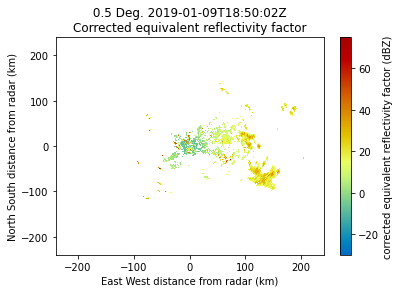

In [24]:
display_radar_file = pyart.graph.RadarMapDisplay(radar_file)
display_radar_file.plot_ppi(field)

generate a plot for each of the sweeps

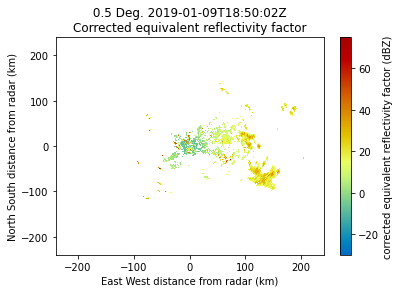

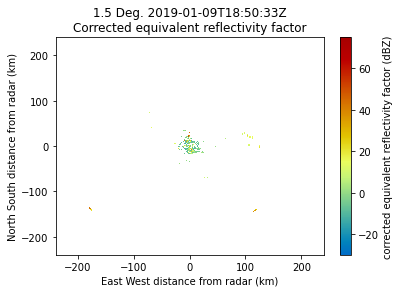

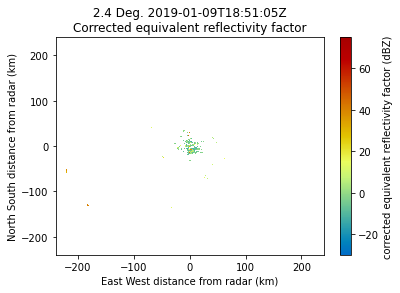

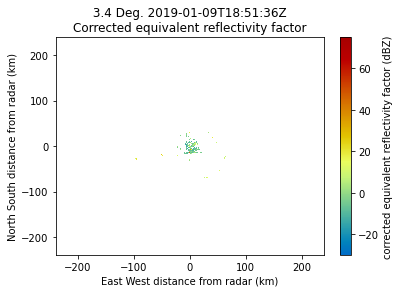

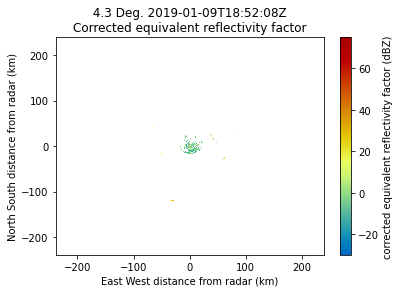

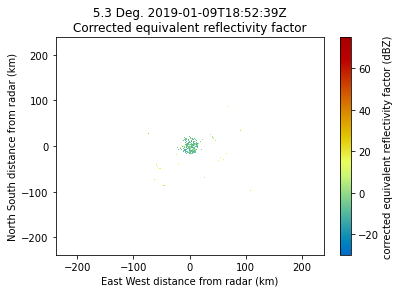

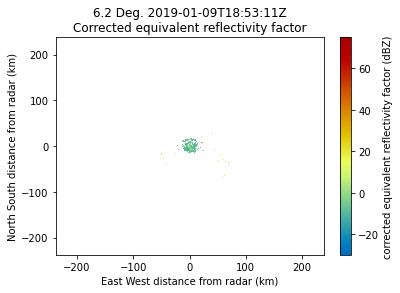

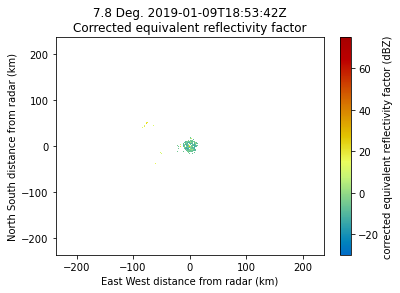

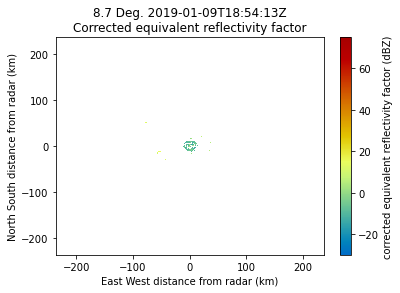

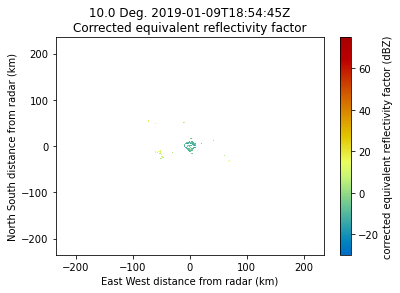

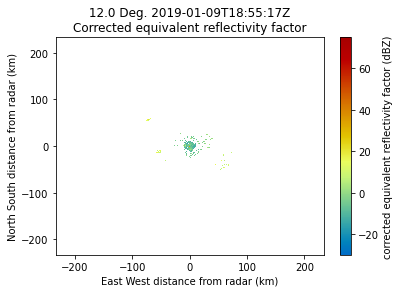

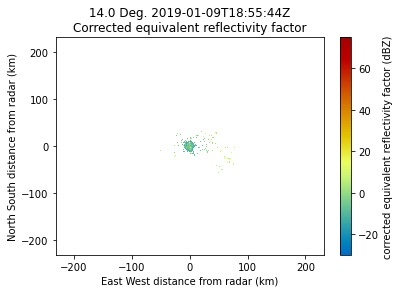

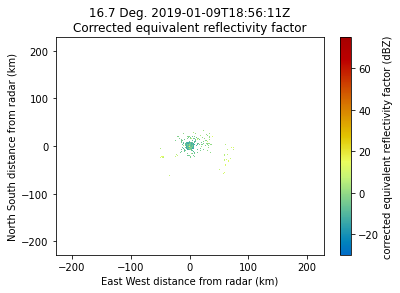

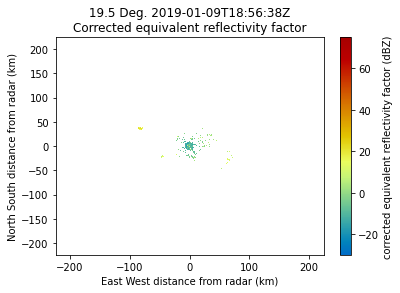

In [27]:
display = pyart.graph.RadarMapDisplay(radar_sweeps)
for sweep in range(radar_sweeps.nsweeps):
    display.plot_ppi(field, sweep=sweep)
    plt.show()